In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# read in joined_gdf
url = "C:/Users/Nissim/Desktop/Vacant Lots Project/vacant-lots-proj/vacancy_guncrime_dash/joined_gdf.geojson"
joined_gdf = gpd.read_file(url).to_crs(epsg=2272)

# import the promise zone shapefile
pz_gdf = gpd.read_file('C:/Users/Nissim/Desktop/Vacant Lots Project/Philadelphia_Promise_Zone.shp').to_crs(epsg=2272)

# clip the joined_gdf to the promise zone
pz_gdf = gpd.clip(joined_gdf, pz_gdf)

C:\Users\Nissim\AppData\Local\Temp\ipykernel_46908\2168369860.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower right',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


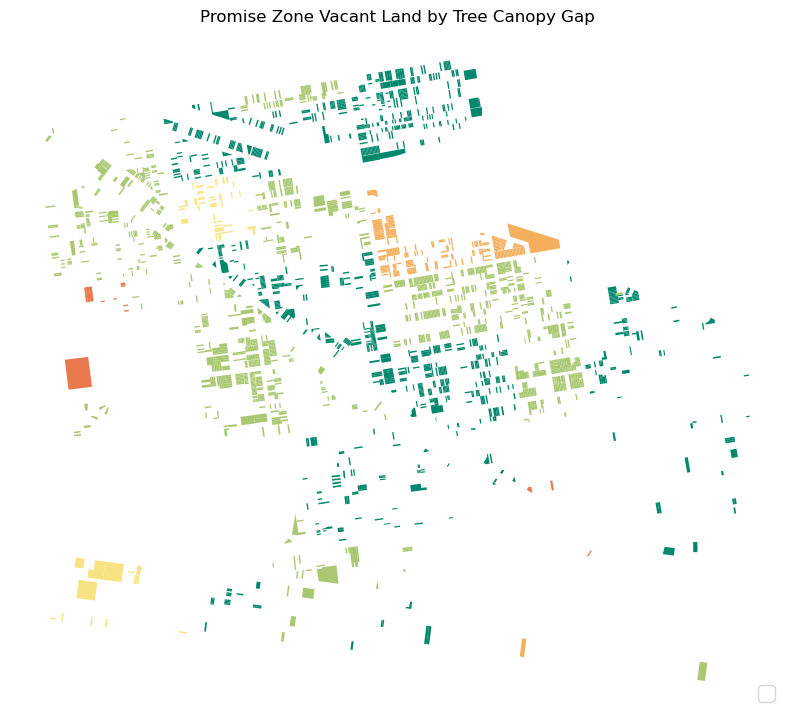

In [8]:
# solution found here: https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/

pct_cmap = {
    'Bottom 50%': '#00876c',
    'Top 50%': '#aac872',
    'Top 25%': '#f7e382',
    'Top 10%': '#f5af5c', 
    'Top 5%' : '#ea784d',
    'Top 1%': '#d43d51'
}


# Plot data
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in pz_gdf.groupby('tree_canopy_gap'):
    
    # Define the color for each group using the dictionary
    color = pct_cmap[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)


ax.set(title='Promise Zone Vacant Land by Tree Canopy Gap')
# Place legend in the lower right hand corner of the plot
ax.legend(loc='lower right',
          fontsize=15,
          frameon=True)

ax.set_axis_off()
plt.show()


In [10]:
pz_gdf[(pz_gdf['tree_canopy_gap'] == 'Top 5%') | (pz_gdf['tree_canopy_gap'] == 'Top 1%')]

,address,bldg_desc,opa_id,councildistrict,zipcode,type,owner,public_owner,comm_partn,li_complaints,li_code_violations,neighborhood,relevant_rcos,tree_canopy_gap,guncrime_density,geometry
33409,3631 WARREN ST,ROW 3 STY MASONRY,241046500,3,19104,Building,SOLIMAN AWATI F H/W; SOLIMAN ABDEL A,False,NaN,NaN,NaN,University City,Powelton Village Civic Association; P.O. Box 7...,Top 5%,Bottom 50%,"POLYGON Z ((2684741.559 238043.584 0.000, 2684..."
31418,3801 LANCASTER AVE,STR/OFF+APTS 3STY MASONRY,871402175,3,19104,Building,GOSNELL K B,False,NaN,Construction Complaints; Maintenance Complaint...,INTERIOR DEMOLITION; PARTIAL DEMOLITION; PARTI...,Powelton,Powelton Village Civic Association; P.O. Box 7...,Top 5%,Bottom 50%,"POLYGON Z ((2684074.369 238853.625 0.000, 2684..."
27555,3712 BARING ST,SEMI/DET 3 STY MASONRY,241165800,3,19104,Building,WM A & ELIZ COX,False,NaN,NaN,ID STRUCTURE; ROOF DEFICIENCIES; INTERIOR UNSA...,Powelton,Powelton Village Civic Association; P.O. Box 7...,Top 5%,Bottom 50%,"POLYGON Z ((2684334.343 238824.771 0.000, 2684..."
26936,701-41 N 48TH ST,SCHOOL 3STY MASONRY,783707600,3,19139,Building,SCHOOL DISTRICT OF PHILA,False,NaN,NaN,EXTERIOR AREA WEEDS; EXIT SIGNS\r\n; PERIODIC ...,Mill Creek,Mill Creek Advisory Council; 4700 Brown Street...,Top 5%,Bottom 50%,"POLYGON Z ((2678907.338 240040.254 0.000, 2678..."
17372,800 N 46TH ST,VAC LAND COMM. < ACRE,885088900,3,19139,Lot,SOPHIA AND DAD LLC,False,NaN,NaN,NaN,Mill Creek,Mill Creek Advisory Council; 4700 Brown Street...,Top 5%,Bottom 50%,"POLYGON Z ((2679286.703 240923.654 0.000, 2679..."
6440,808 N 46TH ST,VAC LAND RES < ACRE,062373700,3,19139,Lot,CITY LAND DEVELOPMENT LLC,False,NaN,NaN,NaN,Mill Creek,Mill Creek Advisory Council; 4700 Brown Street...,Top 5%,Bottom 50%,"POLYGON Z ((2679278.740 240985.813 0.000, 2679..."
19648,820 N MARKOE ST,VAC LAND RES < ACRE,062397110,3,19139,Lot,PHILADELPHIA HOUSING AUTHORITY,True,NaN,NaN,NaN,Mill Creek,Mill Creek Advisory Council; 4700 Brown Street...,Top 5%,Bottom 50%,"POLYGON Z ((2679011.834 241034.152 0.000, 2679..."
33900,820 JUNE ST,ROW 2 STY MASONRY,886810226,3,19139,Building,PHILADELPHIA HOUSING AUTHORITY,True,NaN,NaN,NaN,Mill Creek,Mill Creek Advisory Council; 4700 Brown Street...,Top 5%,Bottom 50%,"POLYGON Z ((2679159.081 241064.294 0.000, 2679..."
12101,4646 PARRISH ST,VAC LAND RES < ACRE,062058210,3,19139,Lot,REDEVELOPMENT AUTHORITY OF PHILADELPHIA,True,NaN,NaN,NaN,Mill Creek,Mill Creek Advisory Council; 4700 Brown Street...,Top 5%,Bottom 50%,"POLYGON Z ((2678837.394 241034.522 0.000, 2678..."
21715,4642-44 PARRISH ST,VAC LAND RES < ACRE,062058100,3,19139,Lot,CHURCH; MOUNT HOPE BAPTIST,False,NaN,NaN,NaN,Mill Creek,Mill Creek Advisory Council; 4700 Brown Street...,Top 5%,Bottom 50%,"POLYGON Z ((2678856.863 241037.557 0.000, 2678..."
